Check that the auto-correlations of the simulation are a sane value when calibrated into K.

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData
import os
from glob import glob
import hera_pspec as hp
from hera_pspec.data import DATA_PATH
import time

In [43]:
sim_path = '/data4/paper/HERA19Golden/Simulation/'
suffix = 'uvCP'
pols = ['xx','yy','xy','yx']
sim_files = {}
for pol in pols:
    file_search = sim_path+'zen*'+'.'+pol+'.HH.'+suffix
    sim_files[pol] = np.sort(glob(file_search))

In [46]:
len(sim_files['xx'])*4

528

In [51]:
# Bring in the beam calibration to K
cosmo = hp.conversions.Cosmo_Conversions()
print cosmo

# List of beamfile to load. This is a healpix map.
beamfile = os.path.join(DATA_PATH, 'NF_HERA_Beams.beamfits')
# intantiate beam and pass cosmology, if not fed, a default Planck cosmology will be assumed
uvb = hp.pspecbeam.PSpecBeamUV(beamfile, cosmo=cosmo)

# For these purposes, it matters not what the frequency array is, so long as they are all the same
uvd = UVData()
uvd.read_miriad(sim_files['xx'][0])
freqs = np.unique(uvd.freq_array)

# find conversion factor from Jy to mK
Jy_to_K_xx = uvb.Jy_to_mK(freqs,pol='xx')/1000.
Jy_to_K_yy = uvb.Jy_to_mK(freqs,pol='yy')/1000.
# This pukes 
# Jy_to_K_xy = uvb.Jy_to_mK(freqs,pol='xy')/1000.

Cosmo_Conversions object at <0x2b40d45c0f90>
Om_L : 0.6844; Om_b : 0.0491; Om_c : 0.2644; Om_M : 0.3135; Om_k : 0.0021; H0 : 67.2700


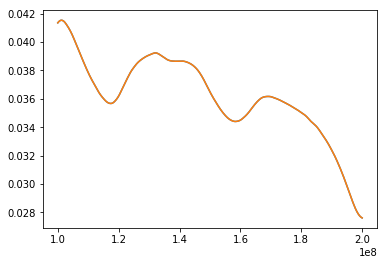

In [52]:
# I find this unlikely
plt.plot(freqs,Jy_to_K_xx,label='xx')
plt.plot(freqs,Jy_to_K_yy,label='yy')
plt.show()

In [54]:
# For the autos with the simulation, it really doesn't matter which antenna you pick ... right?
uvd.antenna_numbers

array([  9,  10,  20,  22,  31,  43,  53,  64,  65,  72,  80,  81,  88,
        89,  96,  97, 104, 105, 112])

Casting complex values to real discards the imaginary part


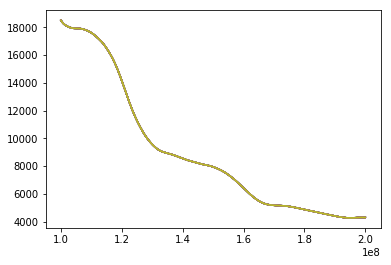

In [68]:
for antno in uvd.antenna_numbers:
    plt.plot(freqs,uvd.get_data((antno,antno))[0,:])
plt.show()

In [65]:
T_sky = 180.*np.power(freqs/180.e6,-2.55)
auto = uvd.get_data((10,10))

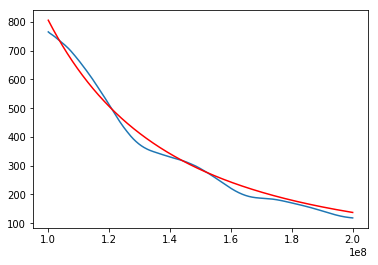

In [66]:
plt.plot(freqs,auto[0,:].real*Jy_to_K_xx)
plt.plot(freqs,T_sky,color='red')
#plt.plot(freqs,auto[0,:].imag)
plt.show()

In [69]:
uvd.select?

In [72]:
# Extract the autocorrelations (in Jy) from all of the simulated data, and write to their own pyuvdata file ...
for pol in pols:
    for i,f in enumerate(sim_files[pol]):
        print f
        t0 = time.time()
        if i == 0:
            uvd = UVData()
            uvd.read_miriad(f,bls=(9,9))
        else:
            uvd_tmp = UVData()
            uvd_tmp.read_miriad(f,bls=(9,9))
            uvd += uvd_tmp
        t1 = time.time()
        print('Took',t1-t0,'seconds')
    uvd.write_uvh5(f+'.autos.uvh5')

/data4/paper/HERA19Golden/Simulation/zen.2457755.15856.xx.HH.uvCP
('Took', 0.7778990268707275, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.16612.xx.HH.uvCP


Combined frequencies are not contiguous. This will make it impossible to write this data out to some file types.


('Took', 2.181715965270996, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.17367.xx.HH.uvCP
('Took', 2.2065658569335938, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.18122.xx.HH.uvCP
('Took', 2.191901922225952, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.18878.xx.HH.uvCP
('Took', 2.2700750827789307, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.19633.xx.HH.uvCP
('Took', 2.1788320541381836, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.20389.xx.HH.uvCP
('Took', 2.326521873474121, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.21144.xx.HH.uvCP
('Took', 2.0419399738311768, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.21900.xx.HH.uvCP
('Took', 2.4438259601593018, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.22655.xx.HH.uvCP
('Took', 2.296293020248413, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.23411.xx.HH.uvCP
('Took', 2.2391390800476074, 'seconds')
/data4/pap

('Took', 2.067972183227539, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.76291.xx.HH.uvCP
('Took', 1.7723629474639893, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.77047.xx.HH.uvCP
('Took', 1.8747749328613281, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.77802.xx.HH.uvCP
('Took', 1.9056499004364014, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.78558.xx.HH.uvCP
('Took', 1.9454920291900635, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.79313.xx.HH.uvCP
('Took', 1.8032090663909912, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.80069.xx.HH.uvCP
('Took', 1.8475830554962158, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.80824.xx.HH.uvCP
('Took', 1.8995862007141113, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.81579.xx.HH.uvCP
('Took', 1.9405410289764404, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.82335.xx.HH.uvCP
('Took', 1.9617929458618164, 'seconds')
/data4/

('Took', 2.6486988067626953, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.35498.yy.HH.uvCP
('Took', 2.6119749546051025, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.36253.yy.HH.uvCP
('Took', 2.346769094467163, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.37008.yy.HH.uvCP
('Took', 2.374364137649536, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.37764.yy.HH.uvCP
('Took', 2.333233118057251, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.38519.yy.HH.uvCP
('Took', 2.3452041149139404, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.39275.yy.HH.uvCP
('Took', 2.3234009742736816, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.40030.yy.HH.uvCP
('Took', 2.3259921073913574, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.40786.yy.HH.uvCP
('Took', 2.3249170780181885, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.41541.yy.HH.uvCP
('Took', 2.479745864868164, 'seconds')
/data4/pap

('Took', 2.0197699069976807, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.94422.yy.HH.uvCP
('Took', 1.998460054397583, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.95177.yy.HH.uvCP
('Took', 2.0175108909606934, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.95933.yy.HH.uvCP
('Took', 2.0155088901519775, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.96688.yy.HH.uvCP
('Took', 2.017580986022949, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.97444.yy.HH.uvCP
('Took', 2.0065670013427734, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.98199.yy.HH.uvCP
('Took', 2.013503074645996, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.98955.yy.HH.uvCP
('Took', 2.097623109817505, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.99710.yy.HH.uvCP
('Took', 1.9939298629760742, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457756.00465.yy.HH.uvCP
('Took', 2.0094850063323975, 'seconds')
/data4/pap

('Took', 2.655518054962158, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.53628.xy.HH.uvCP
('Took', 2.328461170196533, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.54384.xy.HH.uvCP
('Took', 2.526310920715332, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.55139.xy.HH.uvCP
('Took', 2.4768240451812744, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.55894.xy.HH.uvCP
('Took', 2.592578172683716, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.56650.xy.HH.uvCP
('Took', 2.683774948120117, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.57405.xy.HH.uvCP
('Took', 2.3397510051727295, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.58161.xy.HH.uvCP
('Took', 2.38488507270813, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.58916.xy.HH.uvCP
('Took', 2.3670639991760254, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.59672.xy.HH.uvCP
('Took', 2.36769700050354, 'seconds')
/data4/paper/HE

('Took', 2.0504817962646484, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457756.12552.xy.HH.uvCP
('Took', 2.0576939582824707, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457756.13308.xy.HH.uvCP
('Took', 2.0358200073242188, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457756.14063.xy.HH.uvCP
('Took', 2.0322060585021973, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457756.14819.xy.HH.uvCP
('Took', 2.010787010192871, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.15856.yx.HH.uvCP
('Took', 2.253582000732422, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.16612.yx.HH.uvCP
('Took', 2.191025972366333, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.17367.yx.HH.uvCP
('Took', 2.2843880653381348, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.18122.yx.HH.uvCP
('Took', 2.2978429794311523, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.18878.yx.HH.uvCP
('Took', 2.092212200164795, 'seconds')
/data4/pap

('Took', 2.400799036026001, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.71759.yx.HH.uvCP
('Took', 2.4257700443267822, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.72514.yx.HH.uvCP
('Took', 2.512902021408081, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.73270.yx.HH.uvCP
('Took', 2.465956926345825, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.74025.yx.HH.uvCP
('Took', 2.4228219985961914, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.74780.yx.HH.uvCP
('Took', 2.5575859546661377, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.75536.yx.HH.uvCP
('Took', 2.5868937969207764, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.76291.yx.HH.uvCP
('Took', 2.6985039710998535, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.77047.yx.HH.uvCP
('Took', 2.6847448348999023, 'seconds')
/data4/paper/HERA19Golden/Simulation/zen.2457755.77802.yx.HH.uvCP
('Took', 2.503782033920288, 'seconds')
/data4/pap

In [75]:
uv_autos = UVData()
uv_autos.read_uvh5(sim_path+'zen.2457756.14819.xx.HH.uvCP.autos.uvh5')

In [77]:
uv_autos.data_array.squeeze().shape

(8052, 1024)

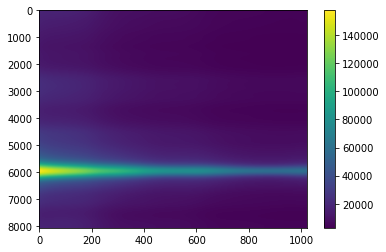

In [81]:
plt.imshow(uv_autos.data_array.squeeze().real,aspect='auto')
plt.colorbar()
plt.show()

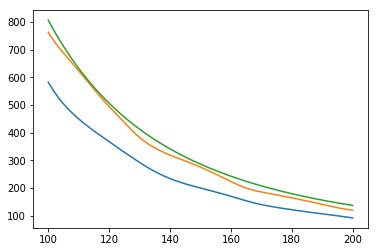

In [86]:
plt.plot(freqs/1e6,uv_autos.data_array.squeeze()[2000,:].real*Jy_to_K_xx)
#plt.plot(freqs/1e6,uv_autos.data_array.squeeze()[6000,:].real*Jy_to_K_xx)
plt.plot(freqs/1e6,uv_autos.data_array.squeeze()[4000,:].real*Jy_to_K_xx)
plt.plot(freqs/1e6,T_sky)
plt.show()

In [87]:
ls

1_HPWpipe.ipynb              HERA19SEFD.ipynb
2_HPWpipe.ipynb              hsa7458_v001.py
3b_HPWpipe_1Dplot.ipynb      hsa7458_v001.pyc
add_antpos_to_sim.py*        LICENSE
add_uvw_and_antpos.py*       miriad_to_uvh5.py
apply_abscal.sh              notes_on_aipy_to_miriad.txt
casa_cal_to_hdf5.py          prep_gc_transit.py
CheckAutosCalibration.ipynb  RawDataCalibrationScripts/
convert_sim.py               README.md
hdf5_to_calfits.py           SaulPaperSimDataCASA.py
HERA19_GC_Calibration.ipynb  SaulPaperSimDataPython.py
HERA19ReAnalysis.ipynb
